**Packages**

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import concatenate
import tifffile

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import os

import scipy

2023-03-20 01:08:18.253549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 01:08:18.392696: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 01:08:18.392722: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 01:08:19.161816: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

**Helper Functions**

In [2]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
   # plt.plot(history.history['accuracy'], label='accuracy')
   # plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.ylim([0, 
            max(
                max(history.history['loss']),
                max(history.history['val_loss'])
            )])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()
    plt.grid(True)

In [3]:
def plot_accuracy(history):
   # plt.plot(history.history['loss'], label='loss')
   # plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.ylim([0, 
            max(
                max(history.history['accuracy']),
                max(history.history['val_accuracy'])
            )])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.grid(True)

**Data Pre-Processing**

In [4]:
tiles = pd.read_csv(r'./Data/Tiles_binned_zipcode.csv')
tiles.head(5)

,Tile_ID,Long2,Lat2,Long1,Lat1,Mid_lat,Mid_long,Stop_Signs,Paving_historical,Paving_future,...,94129,94130,94131,94132,94133,94134,94141,94143,94158,94188
0,36,-122.514446,37.779636,-122.513306,37.778732,37.779184,-122.513876,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,37,-122.514446,37.778732,-122.513306,37.777829,37.778280,-122.513876,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,151,-122.513306,37.779636,-122.512166,37.778732,37.779184,-122.512736,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,152,-122.513306,37.778732,-122.512166,37.777829,37.778280,-122.512736,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,153,-122.513306,37.777829,-122.512166,37.776925,37.777377,-122.512736,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


https://stackoverflow.com/questions/66227003/reverse-geocoding-getting-postal-code-with-geopy-nominatim

In [5]:
# #!pip3 install geopy
# import geopy
# import pandas as pd

# def get_zipcode(df, geolocator, lat_field, lon_field, attempt=1, max_attempts=100):
#     try:
#         location = geolocator.reverse((df[lat_field], df[lon_field]), timeout=None)
#         return location.raw['address']['postcode']
#     except KeyError:
#         pass
#     except GeocoderTimedOut:
#         if attempt <= max_attempts:
#             return get_zipcode (df, attempt=attempt+1)
#         raise

# geolocator = geopy.Nominatim(user_agent='1234')
# #geolocator = geopy.Nominatim(user_agent='my-application')

# df = pd.DataFrame({
#     'Lat': [29.39291, 29.39923, 29.40147, 29.38752, 29.39291, 29.39537, 29.39343, 29.39291, 29.39556],
#     'Lon': [-98.50925, -98.51256, -98.51123, -98.52372, -98.50925, -98.50402, -98.49707, -98.50925, -98.53148]
# })
# zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')

In [6]:
# zipcodes

In [7]:
#zipcodes1 = tiles.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat1', lon_field='Long1')

In [8]:
#zipcodes2 = tiles.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat2', lon_field='Long2')

In [9]:
#zipcodes3 = tiles.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Mid_lat', lon_field='Mid_long')

In [10]:
tiles.columns

Index(['Tile_ID', 'Long2', 'Lat2', 'Long1', 'Lat1', 'Mid_lat', 'Mid_long',
       'Stop_Signs', 'Paving_historical', 'Paving_future', 'Bus_stop',
       'Collisions_Future', 'Collisions_Historical', 'bin', 'RTTYP_I',
       'RTTYP_M', 'RTTYP_O', 'RTTYP_S', 'RTTYP_U', 'Collisions_Future_binary',
       'Collisions_Historical_binary', 'bins_numeric', 'zip_code', '94101',
       '94102', '94104', '94105', '94107', '94108', '94109', '94110', '94111',
       '94112', '94114', '94115', '94116', '94117', '94118', '94121', '94122',
       '94123', '94124', '94127', '94129', '94130', '94131', '94132', '94133',
       '94134', '94141', '94143', '94158', '94188'],
      dtype='object')

Split into training and test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(tiles[['Tile_ID', 'Long2', 'Lat2', 'Long1', 'Lat1', 'Mid_lat', 'Mid_long',
       'Stop_Signs', 'Paving_historical', 'Paving_future', 'Bus_stop',
       'Collisions_Future', 'Collisions_Historical', 'RTTYP_I',
       'RTTYP_M', 'RTTYP_O', 'RTTYP_S', 'RTTYP_U', 'Collisions_Future_binary',
       'Collisions_Historical_binary', 'bins_numeric', 'zip_code', '94101',
       '94102', '94104', '94105', '94107', '94108', '94109', '94110', '94111',
       '94112', '94114', '94115', '94116', '94117', '94118', '94121', '94122',
       '94123', '94124', '94127', '94129', '94130', '94131', '94132', '94133',
       '94134', '94141', '94143', '94158', '94188']], 
                                   tiles['bin'],
                                   random_state=104, 
                                   test_size=0.20, 
                                   shuffle=True)

Image Pre-Processing

In [12]:
#eda
img = tifffile.imread('../210_Capstone_Aditya_Arisa_Noriel/Satellite Imagery/Satellite Images Tiled/36.tif')[0:148, 0:188, :]
img2 = tifffile.imread('../210_Capstone_Aditya_Arisa_Noriel/Satellite Imagery/Satellite Images Tiled/37.tif')[0:148, 0:188, :]

In [13]:
# eda
print(np.shape(img2))

(148, 188, 4)


In [14]:
# eda
test = []
test.append(img[0:148, 0:188, :])
test.append(img2[0:148, 0:188, :])
print(np.shape(test))
test = np.stack(test)
print(np.shape(test))

(2, 148, 188, 4)
(2, 148, 188, 4)


In [15]:
img

array([[[185., 177., 160., 130.],
        [184., 178., 161., 130.],
        [184., 178., 160., 130.],
        ...,
        [105., 108.,  70., 173.],
        [117., 117.,  82., 166.],
        [112., 126.,  76., 182.]],

       [[184., 178., 161., 131.],
        [184., 178., 160., 130.],
        [183., 177., 159., 129.],
        ...,
        [104., 108.,  71., 173.],
        [113., 115.,  80., 163.],
        [110., 123.,  76., 177.]],

       [[183., 178., 159., 128.],
        [183., 177., 159., 127.],
        [183., 177., 159., 127.],
        ...,
        [101., 110.,  71., 170.],
        [109., 116.,  77., 168.],
        [110., 124.,  78., 179.]],

       ...,

       [[141., 131., 103.,  53.],
        [142., 131., 102.,  56.],
        [148., 139., 108.,  62.],
        ...,
        [ 72.,  88.,  51., 101.],
        [ 78.,  92.,  54., 109.],
        [ 82.,  97.,  56., 116.]],

       [[138., 130., 100.,  52.],
        [140., 131., 101.,  54.],
        [146., 136., 107.,  60.],
        .

In [16]:
img[0][0]

array([185., 177., 160., 130.], dtype=float32)

In [17]:
np.array([np.mean(img[0][0][0:3]),img[0][0][3]])

array([174., 130.], dtype=float32)

In [18]:
img_color = []
for i in img:
    for j in i:
        img_color.append([np.mean(j[0:3]),j[3]])
np.array(img_color)

array([[174.      , 130.      ],
       [174.33333 , 130.      ],
       [174.      , 130.      ],
       ...,
       [ 71.      , 106.      ],
       [ 68.333336, 101.      ],
       [ 65.333336,  91.      ]], dtype=float32)

In [19]:
IMAGE_PATH = './Satellite Imagery/Satellite Images Tiled/' 

def preprocess_data_part1(IMAGE_PATH):
    """ Generate lists of images and labelsbased on temp_no_refer and temp_refer lists
    
    Params:
    -------
    IMAGE_PATH (str): path to directory with images.
    
    Returns:
    --------
    images_mini  (np.ndarray): Images of shape (N, 149 3)
    """
    
    data_mini = []
    
    for id in x_train['Tile_ID']:    
                    
        # read image and store as matrix            
        # Index at the end makes all images the same size (they sometimes differ by 1 pixel)
        image = tifffile.imread(IMAGE_PATH + str(id) + '.tif')[0:148, 0:188, :]
            
        # append to images
        data_mini.append(image)
 
    # stack images and trasnform to array
    images_mini = np.stack(data_mini)
    
    return images_mini

In [20]:
images_mini = preprocess_data_part1(IMAGE_PATH)
np.shape(images_mini)

(8376, 148, 188, 4)

In [21]:
#images_mini

In [22]:
# def preprocess_data_part2(IMAGE_ARRAY):
    
#     images_mini_list1 = []
    
#     for i in IMAGE_ARRAY:
#         for j in i:
#             for k in j:
#                 images_mini_list1.append([np.mean(k[0:3]),k[3]])
    
#     #images_mini = np.stack(images_mini_list1)
    
#     return images_mini_list1
#     #     #img_color.append([np.mean(j[0:3]),j[3]])

In [23]:
# images_mini2 = preprocess_data_part2(images_mini)
# np.shape(images_mini2)

In [24]:
# images_mini2

In [25]:
# images_mini_list2 = []
# for i in images_mini_list1:
#     images_mini_list1.append(i)

In [26]:
# images_mini_list2[0]

In [27]:
image_mini1=images_mini.reshape(8376*111296)

In [28]:
image_mini1

array([167., 165., 154., ..., 112., 113.,  34.], dtype=float32)

In [29]:
image_mini1[0:20]

array([167., 165., 154.,  91., 165., 163., 154., 103., 143., 141., 133.,
        70., 138., 135., 126.,  61., 137., 135., 126.,  60.],
      dtype=float32)

In [30]:
image_mini_1s = image_mini1[0::4]
image_mini_2s = image_mini1[1::4]
image_mini_3s = image_mini1[2::4]
image_mini_4s = image_mini1[3::4]

In [31]:
image_mini_1s[0]

167.0

In [32]:
image_mini_2s[0]

165.0

In [33]:
image_mini_3s[0]

154.0

In [34]:
image_mini_4s[0]

91.0

In [35]:
len(image_mini_1s) == 8376*111296/4

True

In [36]:
len(image_mini_1s)

233053824

In [37]:
image_mini_123s = np.hstack((image_mini_1s, image_mini_2s, image_mini_3s))

In [38]:
len(image_mini_123s)/3

233053824.0

In [39]:
n=int(len(image_mini_123s)/3)
[image_mini_123s[0], image_mini_123s[n], image_mini_123s[2*n]]

[167.0, 165.0, 154.0]

In [40]:
# n=int(len(image_mini_123s)/3)
# for i in range(n):
#     print(int(image_mini_123s[i]), int(image_mini_123s[n+i]), int(image_mini_123s[2*n+i]))

In [ ]:
n=int(len(image_mini_123s)/3)
image_mini_123s_avg=[]
for i in range(n):
    image_mini_123s_avg.append((int(image_mini_123s[i]) 
                                + int(image_mini_123s[n+i]) 
                                +int(image_mini_123s[2*n+i]))/3)

In [ ]:
image_mini_123s_avg=np.array(image_mini_123s_avg)

Street Data Pre-Processing

In [18]:
street = np.asarray(x_train[['Tile_ID', 'Mid_lat', 'Mid_long',
       'Stop_Signs', 'Paving_historical', 'Paving_future', 'Bus_stop',
       'Collisions_Future', 'Collisions_Historical']]).astype('float32')
street_mini = []
for row in range(len(street)):
    street_mini.append([[street[row]]])
street_mini = np.stack(street_mini)
np.shape(street_mini)

(8376, 1, 1, 9)

In [19]:
street_t = np.asarray(x_test[['Tile_ID', 'Mid_lat', 'Mid_long',
       'Stop_Signs', 'Paving_historical', 'Paving_future', 'Bus_stop',
       'Collisions_Future', 'Collisions_Historical']]).astype('float32')
street_mini_t = []
for row in range(len(street_t)):
    street_mini_t.append([[street_t[row]]])
street_mini_t = np.stack(street_mini_t)
np.shape(street_mini_t)

(2095, 1, 1, 9)

**Noriel's Models**

In [38]:
np.shape(street_mini)

(8376, 1, 1, 9)

In [39]:
np.shape(images_mini)

(8376, 148, 188, 4)

In [40]:
input_image_street = np.hstack(
    (street_mini.reshape((8376,9)),
     images_mini.reshape(8376,111296))
)

In [20]:
import math
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from numba import cuda 

import os

import pandas as pd

import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_decision_forests as tfdf
import tifffile
from keras.layers import Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import concatenate


import scipy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [21]:
#[images_mini, street_mini]

In [ ]:
pd.DataFrame(images_mini)

In [22]:
y_train

8419     C
10129    B
7641     A
5215     A
7784     A
        ..
6310     B
8846     B
729      A
5825     A
8261     B
Name: bin, Length: 8376, dtype: object

In [23]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

In [24]:
y_train

array([2, 1, 0, ..., 0, 0, 1])

In [45]:
pd.DataFrame(input_image_street)

,0,1,2,3,4,5,6,7,8,9,...,111295,111296,111297,111298,111299,111300,111301,111302,111303,111304
0,10993.0,37.750271,-122.405563,0.0,0.0,0.0,0.0,3.0,2.0,167.0,...,84.0,129.0,158.0,154.0,104.0,175.0,149.0,145.0,106.0,177.0
1,13338.0,37.709606,-122.382767,0.0,0.0,0.0,0.0,1.0,0.0,142.0,...,114.0,118.0,147.0,141.0,113.0,132.0,155.0,147.0,119.0,130.0
2,10163.0,37.772858,-122.413544,0.0,0.0,0.0,0.0,0.0,0.0,191.0,...,161.0,112.0,166.0,169.0,159.0,107.0,173.0,172.0,163.0,120.0
3,7523.0,37.768341,-122.439766,1.0,0.0,0.0,1.0,0.0,0.0,60.0,...,52.0,98.0,64.0,81.0,55.0,101.0,54.0,66.0,49.0,78.0
4,10314.0,37.740330,-122.412407,2.0,0.0,0.0,0.0,0.0,0.0,47.0,...,60.0,26.0,53.0,64.0,57.0,32.0,60.0,68.0,61.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,8701.0,37.743038,-122.428368,4.0,0.0,3.0,0.0,1.0,0.0,168.0,...,159.0,122.0,185.0,182.0,168.0,128.0,182.0,174.0,163.0,118.0
8372,11464.0,37.740330,-122.401001,0.0,1.0,2.0,0.0,1.0,0.0,187.0,...,81.0,26.0,69.0,79.0,76.0,37.0,86.0,89.0,76.0,78.0
8373,1831.0,37.715931,-122.496773,0.0,0.0,0.0,0.0,0.0,0.0,209.0,...,59.0,72.0,73.0,72.0,59.0,66.0,74.0,71.0,56.0,73.0
8374,8179.0,37.799065,-122.432930,4.0,6.0,0.0,0.0,0.0,1.0,130.0,...,110.0,45.0,138.0,123.0,116.0,56.0,166.0,164.0,146.0,84.0


In [ ]:
rf_model = tfdf.keras.RandomForestModel(categorical_algorithm = 'CART', num_trees=100)

rf_model.fit(input_image_street,
    y_train,
    #validation_data=[x_test[['Collisions_Historical', 'Mid_lat','Mid_long', 'Stop_Signs', 'Paving_historical', 'Bus_stop']], y_test],     
    epochs=1,
    verbose=1)

Use /tmp/tmp0k3y6ehj as temporary training directory
Reading training dataset...


2023-03-19 22:22:46.243451: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 3729162720 exceeds 10% of free system memory.


In [32]:
print(rf_model.summary())

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (47):
	data:0.0
	data:0.1
	data:0.10
	data:0.11
	data:0.12
	data:0.13
	data:0.14
	data:0.15
	data:0.16
	data:0.17
	data:0.18
	data:0.19
	data:0.2
	data:0.20
	data:0.21
	data:0.22
	data:0.23
	data:0.24
	data:0.25
	data:0.26
	data:0.27
	data:0.28
	data:0.29
	data:0.3
	data:0.30
	data:0.31
	data:0.32
	data:0.33
	data:0.34
	data:0.35
	data:0.36
	data:0.37
	data:0.38
	data:0.39
	data:0.4
	data:0.40
	data:0.41
	data:0.42
	data:0.43
	data:0.44
	data:0.45
	data:0.46
	data:0.5
	data:0.6
	data:0.7
	data:0.8
	data:0.9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "data:0.20"  0.216889 ################
    2. "data:0.11"  0.

In [33]:
##uncomment to show training log
#rf_model_train.make_inspector().training_logs()
rf_model.make_inspector().evaluation()

Evaluation(num_examples=8376, accuracy=0.9977316141356256, loss=0.019867436299874395, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [35]:
pd.DataFrame(rf_model.predict(x_train[['Tile_ID', 'Long2', 'Lat2', 'Long1', 'Lat1', 'Mid_lat', 'Mid_long',
       'Stop_Signs', 'Paving_historical', 'Paving_future', 'Bus_stop',
       'Collisions_Future', 'Collisions_Historical', 'RTTYP_I',
       'RTTYP_M', 'RTTYP_O', 'RTTYP_S', 'RTTYP_U', 'Collisions_Future_binary',
       'Collisions_Historical_binary', 'bins_numeric', 'zip_code', '94101',
       '94102', '94104', '94105', '94107', '94108', '94109', '94110', '94111',
       '94112', '94114', '94115', '94116', '94117', '94118', '94121', '94122',
       '94123', '94124', '94127', '94129', '94130', '94131', '94132', '94133']]))

262/262 [==============================] - 0s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.020000,0.979999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.999999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.999999,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.999999,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999999,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8371,0.000000,0.999999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8372,0.000000,0.999999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8373,0.999999,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8374,0.999999,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


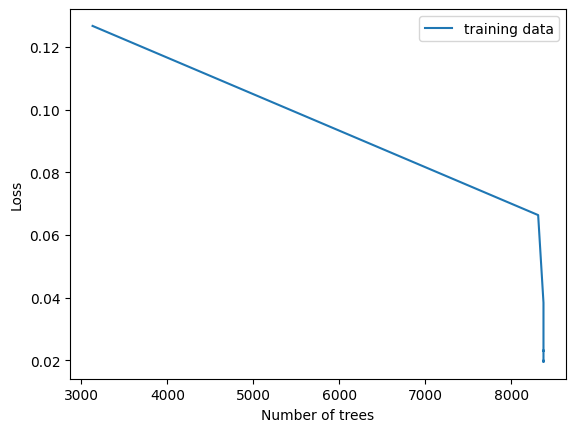

In [36]:
import matplotlib.pyplot as plt

logs = rf_model.make_inspector().training_logs()

plt.plot([log.evaluation.num_examples for log in logs], [log.evaluation.loss for log in logs], label="training data")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Modeling**

Helpful Links: <br>
https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/ <br>
https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50 <br>
https://github.com/jimmyyhwu/resnet18-tf2/blob/master/resnet.py <BR>

**Model 2.1: CNN (layers added, ResNet-18)**

In [ ]:
# x: Satellite Images, 'Collisions_Historical', 'Mid_lat','Mid_long', 'Stop_Signs', 'Paving_historical', 'Bus_stop'
# y: 'Collisions_Future'

# ACCORDING TO THE PAPER, THEY DOWNSIZED THE IMAGES FIRST INTO SMALLER MATRICES 
# THEN ADDED THE STREET CHARACTERISTICS TO THE SMALLER MATRIX
# REFERENCE THE DIAGRAM ON THE PAPER

def create_cnn_model():

    # INPUT LAYERS
    input1 = tf.keras.layers.Input(shape=(148, 188, 4), name='Input_Images')
    input2 = tf.keras.layers.Input(shape=(1,1,11), name='Input_Street')
    
    #CNN FOR IMAGE PROCESSING
    cnn = tf.keras.layers.Conv2D(11, (4,4), activation="relu")(input1)
    pooling = tf.keras.layers.MaxPooling2D((4, 4), strides=2)(cnn)
    images = tf.keras.models.Model(inputs=input1, outputs=pooling)
    
    #ADDING STREET DATA
    #combined = tf.keras.layers.Concatenate(axis = 2)([images.output, input2])
    combined = tf.keras.layers.Add()([images.output, input2])
    
    # PAPER USES RESNET-18 FOR THE REST OF THE MODEL WITH THE COMBINED DATA
    resnet = resnet18(combined)
    output = tf.keras.layers.Dense(units=12, activation='softmax', name='output')(resnet)
    
    #instantiation layer 
    cnn_model = tf.keras.models.Model(inputs=[input1, input2], outputs=output)
    
    return cnn_model

cnn_model = create_cnn_model()

cnn_model.summary()

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

class_weight = {0: 100,
                1: 1000,
                2: 1000,
                3: 1000,
                4: 1000,
                5: 1000,
                6: 1000,
                7: 1000,
                8: 1000,
                9: 1000,
                10: 1000,
                11: 1000,
               }

history = cnn_model.fit(
    [images_mini, street_mini],
    np.stack(y_train),
    epochs=10,
    # Suppress logging.
     verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    class_weight = class_weight
    )

In [ ]:
plot_loss(history)

In [ ]:
plot_accuracy(history)

In [ ]:
predicted_result = cnn_model.predict([images_mini_t, street_mini_t])
test_values = []
for i in predicted_result: 
    input_list = i
    max_value = max(input_list)
    index = [index for index, item in enumerate(input_list) if item == max_value]
    test_values.append(index[0])
print('macro f1: ', f1_score(y_test, test_values, average = 'macro' ))
print('f1 by class: ', f1_score(y_test, test_values, average = None ))

**Model 2.2: Second CNN (layers added, ResNet-34)**

In [ ]:
# x: Satellite Images, 'Collisions_Historical', 'Mid_lat','Mid_long', 'Stop_Signs', 'Paving_historical', 'Bus_stop'
# y: 'Collisions_Future'

# ACCORDING TO THE PAPER, THEY DOWNSIZED THE IMAGES FIRST INTO SMALLER MATRICES 
# THEN ADDED THE STREET CHARACTERISTICS TO THE SMALLER MATRIX
# REFERENCE THE DIAGRAM ON THE PAPER

def create_cnn_model():

    # INPUT LAYERS
    input1 = tf.keras.layers.Input(shape=(148, 188, 4), name='Input_Images')
    input2 = tf.keras.layers.Input(shape=(1,1,11), name='Input_Street')
    
    #CNN FOR IMAGE PROCESSING
    cnn = tf.keras.layers.Conv2D(11, (4,4), activation="relu")(input1)
    pooling = tf.keras.layers.MaxPooling2D((4, 4), strides=2)(cnn)
    images = tf.keras.models.Model(inputs=input1, outputs=pooling)
    
    #ADDING STREET DATA
    #combined = tf.keras.layers.Concatenate(axis = 2)([images.output, input2])
    combined = tf.keras.layers.Add()([images.output, input2])
    
    # PAPER USES RESNET-18 FOR THE REST OF THE MODEL WITH THE COMBINED DATA
    resnet = resnet34(combined)
    output = tf.keras.layers.Dense(units=12, activation='softmax', name='output')(resnet)
    
    #instantiation layer 
    cnn_model = tf.keras.models.Model(inputs=[input1, input2], outputs=output)
    
    return cnn_model

cnn_model = create_cnn_model()

cnn_model.summary()

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

class_weight = {0: 100,
                1: 1000,
                2: 1000,
                3: 1000,
                4: 1000,
                5: 1000,
                6: 1000,
                7: 1000,
                8: 1000,
                9: 1000,
                10: 1000,
                11: 1000,
               }

history = cnn_model.fit(
    [images_mini, street_mini],
    np.stack(y_train),
    epochs=10,
    # Suppress logging.
     verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    class_weight = class_weight, 
    )


In [ ]:
plot_loss(history)

In [ ]:
plot_accuracy(history)

In [ ]:
predicted_result = cnn_model.predict([images_mini_t, street_mini_t])
predicted_result[0]

In [ ]:
test_values = []
for i in predicted_result: 
    input_list = i
    max_value = max(input_list)
    index = [index for index, item in enumerate(input_list) if item == max_value]
    test_values.append(index[0])
test_values[0:10]

In [ ]:
print('macro f1: ', f1_score(y_test, test_values, average = 'macro' ))
print('f1 by class: ', f1_score(y_test, test_values, average = None ))

**Model 2.3: CNN (layers concatenated, ResNet-18)**

In [ ]:
street_mini_2 = [] 
for k in range(len(street)):
    for i in range(71): 
        for j in range(91):
            street_mini_2.append(street[k])

In [ ]:
street_mini_2 = np.reshape(street_mini_2, (len(street),71,91,11))
np.shape(street_mini_2)

In [ ]:
# x: Satellite Images, 'Collisions_Historical', 'Mid_lat','Mid_long', 'Stop_Signs', 'Paving_historical', 'Bus_stop'
# y: 'Collisions_Future'

# ACCORDING TO THE PAPER, THEY DOWNSIZED THE IMAGES FIRST INTO SMALLER MATRICES 
# THEN ADDED THE STREET CHARACTERISTICS TO THE SMALLER MATRIX
# REFERENCE THE DIAGRAM ON THE PAPER

def create_cnn_model():

    # INPUT LAYERS
    input1 = tf.keras.layers.Input(shape=(148, 188, 4), name='Input_Images')
    input2 = tf.keras.layers.Input(shape=(71,91,11), name='Input_Street')
    
    #CNN FOR IMAGE PROCESSING
    cnn = tf.keras.layers.Conv2D(11, (4,4), activation="relu")(input1)
    pooling = tf.keras.layers.MaxPooling2D((4, 4), strides=2)(cnn)
    images = tf.keras.models.Model(inputs=input1, outputs=pooling)
    
    #ADDING STREET DATA
    combined = tf.keras.layers.Concatenate(axis = 3)([images.output, input2])
    #combined = tf.keras.layers.Add()([images.output, input2])
    
    # PAPER USES RESNET-18 FOR THE REST OF THE MODEL WITH THE COMBINED DATA
    resnet = resnet18(combined)
    output = tf.keras.layers.Dense(units=12, activation='softmax', name='output')(resnet)
    
    #instantiation layer 
    cnn_model = tf.keras.models.Model(inputs=[input1, input2], outputs=output)
    
    return cnn_model

cnn_model = create_cnn_model()

cnn_model.summary()

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

class_weight = {0: 100,
                1: 1000,
                2: 1000,
                3: 1000,
                4: 1000,
                5: 1000,
                6: 1000,
                7: 1000,
                8: 1000,
                9: 1000,
                10: 1000,
                11: 1000,
               }

history = cnn_model.fit(
    [images_mini, street_mini_2],
    np.stack(y_train),
    epochs=10,
    # Suppress logging.
     verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    class_weight = class_weight,
    )

In [ ]:
plot_loss(history)

In [ ]:
plot_accuracy(history)

In [ ]:
street_mini_2_t = [] 
for k in range(len(street_t)):
    for i in range(71): 
        for j in range(91):
            street_mini_2_t.append(street_t[k])
street_mini_2_t = np.reshape(street_mini_2_t, (len(street_t),71,91,11))
np.shape(street_mini_2_t)

In [ ]:
predicted_result = cnn_model.predict([images_mini_t, street_mini_2_t])
test_values = []
for i in predicted_result: 
    input_list = i
    max_value = max(input_list)
    index = [index for index, item in enumerate(input_list) if item == max_value]
    test_values.append(index[0])
print('macro f1: ', f1_score(y_test, test_values, average = 'macro' ))
print('f1 by class: ', f1_score(y_test, test_values, average = None ))

**Model 2.4 CNN (layers added, RESNET 50 FROM TENSORFLOW)**

In [ ]:
# x: Satellite Images, 'Collisions_Historical', 'Mid_lat','Mid_long', 'Stop_Signs', 'Paving_historical', 'Bus_stop'
# y: 'Collisions_Future'

# ACCORDING TO THE PAPER, THEY DOWNSIZED THE IMAGES FIRST INTO SMALLER MATRICES 
# THEN ADDED THE STREET CHARACTERISTICS TO THE SMALLER MATRIX
# REFERENCE THE DIAGRAM ON THE PAPER

def create_cnn_model():

    # INPUT LAYERS
    input1 = tf.keras.layers.Input(shape=(148, 188, 4), name='Input_Images')
    input2 = tf.keras.layers.Input(shape=(1,1,11), name='Input_Street')
    
    #CNN FOR IMAGE PROCESSING
    cnn = tf.keras.layers.Conv2D(11, (4,4), activation="relu")(input1)
    pooling = tf.keras.layers.MaxPooling2D((4, 4), strides=2)(cnn)
    images = tf.keras.models.Model(inputs=input1, outputs=pooling)
    
    #ADDING STREET DATA
    #combined = tf.keras.layers.Concatenate(axis = 2)([images.output, input2])
    combined = tf.keras.layers.Add()([images.output, input2])
    
    # PAPER USES RESNET-18 FOR THE REST OF THE MODEL WITH THE COMBINED DATA
    # RESNET50 FROM TENSORFLOW 
    resnet = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights=None,
    input_tensor=combined,
    input_shape=(71, 91, 11,),
    pooling=None,
    classes=12,
    #**kwargs
    )
    
    flatten = tf.keras.layers.Flatten()(resnet.output)
    
    output = tf.keras.layers.Dense(units=12, activation='softmax', name='output')(flatten)
    
    #instantiation layer 
    cnn_model = tf.keras.models.Model(inputs=[input1, input2], outputs=output)
    
    return cnn_model #cnn_model

cnn_model = create_cnn_model()

cnn_model.summary()

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss= ['sparse_categorical_crossentropy'],
    metrics = ['accuracy'],
    )

class_weight = {0: 100,
                1: 1000,
                2: 1000,
                3: 1000,
                4: 1000,
                5: 1000,
                6: 1000,
                7: 1000,
                8: 1000,
                9: 1000,
                10: 1000,
                11: 1000,
               }

history = cnn_model.fit(
    [images_mini, street_mini],
    np.stack(y_train),
    epochs=10,
    # Suppress logging.
     verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    class_weight = class_weight,
    )

In [ ]:
plot_loss(history)

In [ ]:
plot_accuracy(history)

In [ ]:
predicted_result = cnn_model.predict([images_mini_t, street_mini_t])
test_values = []
for i in predicted_result: 
    input_list = i
    max_value = max(input_list)
    index = [index for index, item in enumerate(input_list) if item == max_value]
    test_values.append(index[0])
print('macro f1: ', f1_score(y_test, test_values, average = 'macro' ))
print('f1 by class: ', f1_score(y_test, test_values, average = None ))